In [1]:
import numpy as np

X = np.array([['Korea', 44, 7200], ['Japan', 27, 4800], ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X[:, 0] = labelencoder.fit_transform(X[:, 0])

print(X)

[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [2]:
import numpy as np

X = np.array([['Korea', 44, 7200], ['Japan', 27, 4800], ['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# Generate 2-Axis Array to handout
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)
X = np.concatenate((XX, X), axis = 1)

print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


In [3]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)

print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
49/49 - 0s - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5000 - 382ms/epoch - 8ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000 - 95ms/epoch - 2ms/step
Epoch 3/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000 - 92ms/epoch - 2ms/step
Epoch 4/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000 - 94ms/epoch - 2ms/step
Epoch 5/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.5000 - 92ms/epoch - 2ms/step
Epoch 6/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5000 - 93ms/epoch - 2ms/step
Epoch 7/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5000 - 94ms/epoch - 2ms/step
Epoch 8/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4991 - val_loss: 0.6932 - val

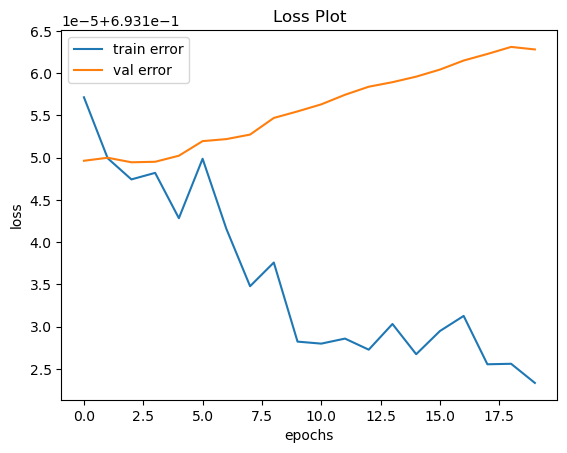

In [4]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetching Data
(train_data, train_labels), (test_data, test_labels) = \
tf.keras.datasets.imdb.load_data( num_words=1000)

# Transforming OneHotEncoder
def one_hot_sequences(sequences, dimension=1000):
  results = numpy.zeros((len(sequences), dimension))

  for i, word_index in enumerate(sequences):
    results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# DNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN Training
history = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data, test_labels),verbose=2)

# Graph Output of Loss values

history_dict = history.history
loss_values = history_dict['loss'] # Training Loss
val_loss_values = history_dict['val_loss'] # Value Loss
acc = history_dict['accuracy'] # Accuracy
epochs = range(1, len(acc) + 1) # Epochs Value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()



Epoch 1/20
49/49 - 0s - loss: 0.7198 - accuracy: 0.4984 - val_loss: 0.7072 - val_accuracy: 0.5000 - 383ms/epoch - 8ms/step
Epoch 2/20
49/49 - 0s - loss: 0.7036 - accuracy: 0.5000 - val_loss: 0.7011 - val_accuracy: 0.5000 - 95ms/epoch - 2ms/step
Epoch 3/20
49/49 - 0s - loss: 0.6998 - accuracy: 0.4948 - val_loss: 0.6986 - val_accuracy: 0.5000 - 94ms/epoch - 2ms/step
Epoch 4/20
49/49 - 0s - loss: 0.6977 - accuracy: 0.4950 - val_loss: 0.6969 - val_accuracy: 0.5000 - 90ms/epoch - 2ms/step
Epoch 5/20
49/49 - 0s - loss: 0.6963 - accuracy: 0.4986 - val_loss: 0.6957 - val_accuracy: 0.5000 - 97ms/epoch - 2ms/step
Epoch 6/20
49/49 - 0s - loss: 0.6952 - accuracy: 0.4946 - val_loss: 0.6948 - val_accuracy: 0.5000 - 98ms/epoch - 2ms/step
Epoch 7/20
49/49 - 0s - loss: 0.6945 - accuracy: 0.5005 - val_loss: 0.6942 - val_accuracy: 0.5000 - 95ms/epoch - 2ms/step
Epoch 8/20
49/49 - 0s - loss: 0.6940 - accuracy: 0.4995 - val_loss: 0.6938 - val_accuracy: 0.5000 - 107ms/epoch - 2ms/step
Epoch 9/20
49/49 - 0s 

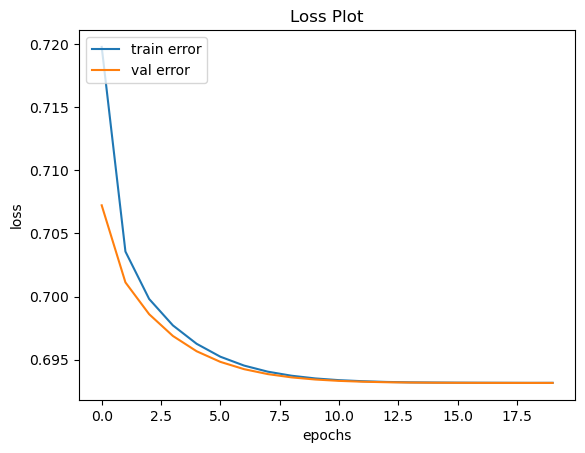

In [5]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetching Data
(train_data, train_labels), (test_data, test_labels) = \
tf.keras.datasets.imdb.load_data( num_words=1000)

# Transforming OneHotEncoder
def one_hot_sequences(sequences, dimension=1000):
  results = numpy.zeros((len(sequences), dimension))

  for i, word_index in enumerate(sequences):
    results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# DNN (Weigh Regulation)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN Training
history = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data, test_labels),verbose=2)

# Graph Output of Loss values

history_dict = history.history
loss_values = history_dict['loss'] # Training Loss
val_loss_values = history_dict['val_loss'] # Value Loss
acc = history_dict['accuracy'] # Accuracy
epochs = range(1, len(acc) + 1) # Epochs Value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()



In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#DNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2209 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0954 - accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0700 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0514 - accuracy: 0.9835
Epoch 5/5
313/313 [==============================] - 0s 764us/step - loss: 0.0617 - accuracy: 0.9814


[0.06169602647423744, 0.9814000129699707]

Epoch 1/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.4986 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.3775 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.3385 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 1s 667us/step - loss: 0.3153 - accuracy: 0.8831
Epoch 5/5
313/313 [==============================] - 0s 425us/step - loss: 0.4008 - accuracy: 0.8515
정확도: 0.8514999747276306


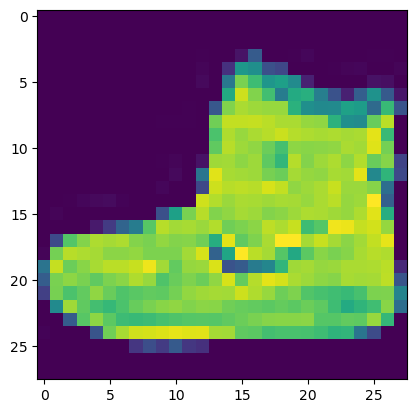

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

#DNN
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('정확도:', test_acc)